# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5, palette='Set2')

## Оценки параметров

На занятии мы рассмотрели пример поиска оценок методом моментов для выборки $X_1, ..., X_n$ из экспоненциального распределения с параметром $\theta$. В стандартном методе моментов мы получили оценку $\widehat{\theta}_1 = 1\left/\overline{X}\right.$, а в обобщенном с пробной функцией $g(x) = x^2$ &mdash; оценку $\widehat{\theta}_2 = \sqrt{1\left/\overline{X^2}\right.}$. Прежде всего заметим, что выбирая разные пробные функции мы можем получить разные оценки параметров. Фактически, пробная функция это *гиперпараметр* метода, которые выбирается пользователем.

Возникает **вопрос**: какая оценка лучше?

Пока что ни одна их них не является лучше другой, и даже ни одна из них не является лучше или хуже оценки $\widehat{\theta}_3 = 100500$. Нам только интуитивно понятно, что оценка $\widehat{\theta}_3$ не должна быть хорошей.

### Небольшое исследование

Проведем численный эксперимент. Сгенерируем 50000 выборок размера 1000 из распределения $Exp(1/5)$ и посчитаем обе оценки, полученные по методу моментов, в зависимости от размера выборки. Обратите внимание, что в `numpy.random` или `scipy.stats` экпоненциальное распределение имеет параметр `scale`, который равен 5 для $Exp(1/5)$.

In [2]:
sample_size = 1000  # размер выборки
samples_count = 50000  # количество выборок

samples = np.random.exponential(scale=5, size=(samples_count, sample_size))

# Считаем оценки
theta_1 = (np.arange(sample_size) + 1) / samples.cumsum(axis=1)
theta_2 = np.sqrt(2*(np.arange(sample_size) + 1) / (samples**2).cumsum(axis=1))

Визуализируем зависимость каждой из оценок от размера выборки. Для наглядности возьмем только первые 100 выборок

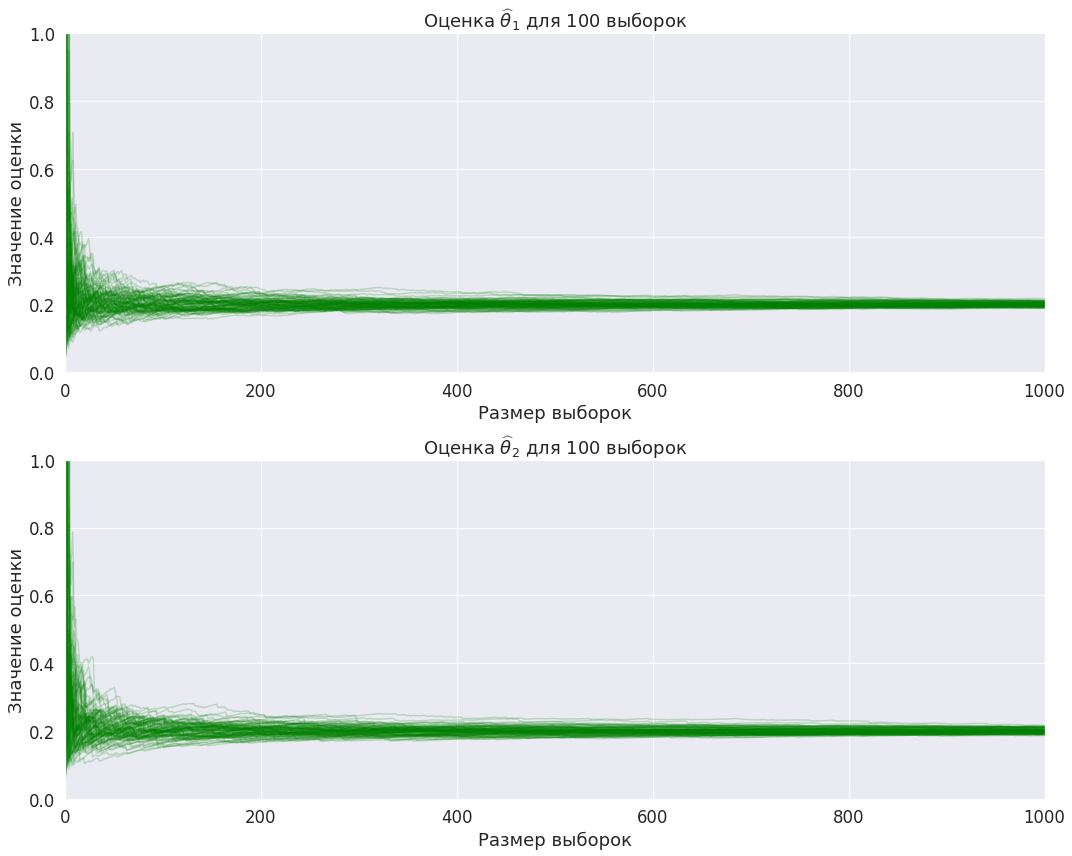

In [3]:
plt.figure(figsize=(15, 12))

for j, theta in enumerate([theta_1, theta_2]):
    plt.subplot(2, 1, j+1)
    
    # рисуем для каждой выборки отдельно
    for i in range(100):
        plt.plot(np.arange(sample_size) + 1, theta[i], color='green', alpha=0.2)

    plt.xlabel('Размер выборок')
    plt.ylabel('Значение оценки')
    plt.title('Оценка $\\widehat{\\theta}_' + str(j+1) + '$ для 100 выборок')
    plt.xlim((0, sample_size))
    plt.ylim((0, 1))
    
plt.tight_layout()  # чтобы графики не перекрывались

По графикам видно, что во всех случаях с ростом размера выборки значение оценки сходится к истинному значению параметра.

Построим ядерные оценки плотности значений оценок в зависимости от значения параметра для трех разных размеров выборок

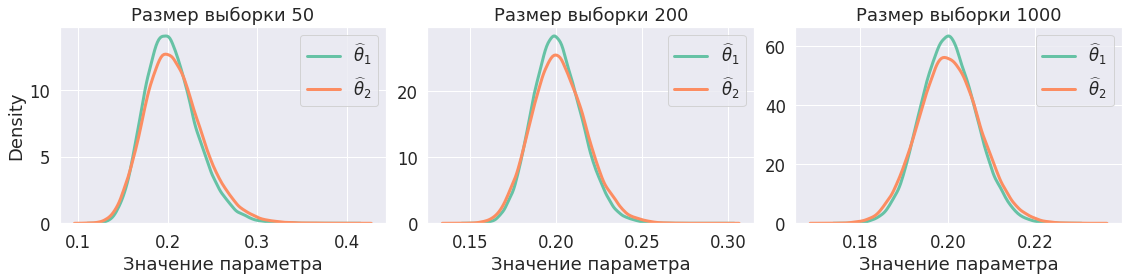

In [4]:
plt.figure(figsize=(16, 4))

for i, size in enumerate([50, 200, 1000]):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(theta_1[:, size-1], lw=3, label='$\\widehat{\\theta}_1$')
    sns.kdeplot(theta_2[:, size-1], lw=3, label='$\\widehat{\\theta}_2$')
    plt.legend()
    plt.title(f'Размер выборки {size}')
    plt.xlabel('Значение параметра')
    if i>0: plt.ylabel('')
    
plt.tight_layout()  # чтобы графики не перекрывались

По гистограммам видно, что разброс оценки $\widehat{\theta}_2$ немного больше разброса оценки $\widehat{\theta}_1$ потому как оценка плотности для нее визуально шире.

Сравним оценки по MSE, а именно, для каждого размера выборки:
* посчитаем квадрат отклонения значения оценки от истинного значения параметра, равного 1/5;
* усредним полученне значения по всем сгенерированным выборкам.

Построим график зависимости полученных значений от размера выборки в логарифмическом масштабе.

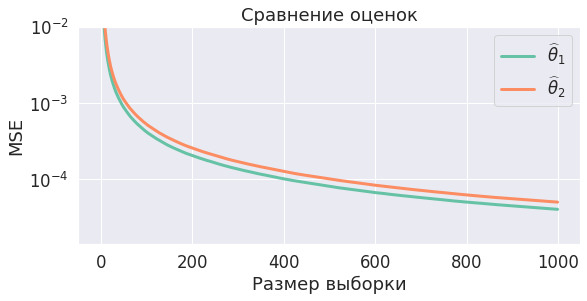

In [5]:
plt.figure(figsize=(9, 4))
plt.plot(
    ((theta_1 - 1/5)**2).mean(axis=0), 
    lw=3,
    label='$\\widehat{\\theta}_1$'
)
plt.plot(
    ((theta_2 - 1/5)**2).mean(axis=0), 
    lw=3,
    label='$\\widehat{\\theta}_2$'
)
plt.title('Сравнение оценок')
plt.xlabel('Размер выборки')
plt.ylabel('MSE')
plt.yscale('log')
plt.legend()
plt.ylim((None, 1e-2));

Как видим по графику, в среднем первая оценка имеет меньшую ошибку для всех рассмотренных размеров выборки. Однако, стоит отметить, что мы рассмотрели только одно значение параметра.